In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df= pd.read_csv("Clustering_Data (1).csv")

In [3]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


In [4]:
df=df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
x=df[df.columns[0:13]]


### Feature scaling

In [7]:
x_min = x.min(axis=0)
x_max = x.max(axis=0)
scaled = (x - x_min) / (x_max - x_min)
    

In [8]:
scaled

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [9]:
scaled.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.518584,0.315484,0.538244,0.458502,0.323278,0.453487,0.356386,0.437460,0.372523,0.322363,0.388170,0.491460,0.334446
std,0.213639,0.220780,0.146708,0.172142,0.155244,0.215811,0.210730,0.234818,0.180555,0.197806,0.185831,0.260070,0.224613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.350658,0.170455,0.454545,0.340206,0.195652,0.262931,0.182489,0.264151,0.264984,0.165529,0.245935,0.244505,0.158702
50%,0.531579,0.222332,0.534759,0.458763,0.304348,0.474138,0.378692,0.396226,0.361199,0.290956,0.394309,0.553114,0.282097
75%,0.696711,0.462945,0.640374,0.561856,0.402174,0.627586,0.534810,0.580189,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Using PCA to reduce the dimension to 3

In [10]:
df_pca = PCA(n_components=3).fit_transform(scaled)

In [11]:
#df_pca

In [12]:
m,n=df_pca.shape

x=df_pca[:,0]
y=df_pca[:,1]
z=df_pca[:,2]

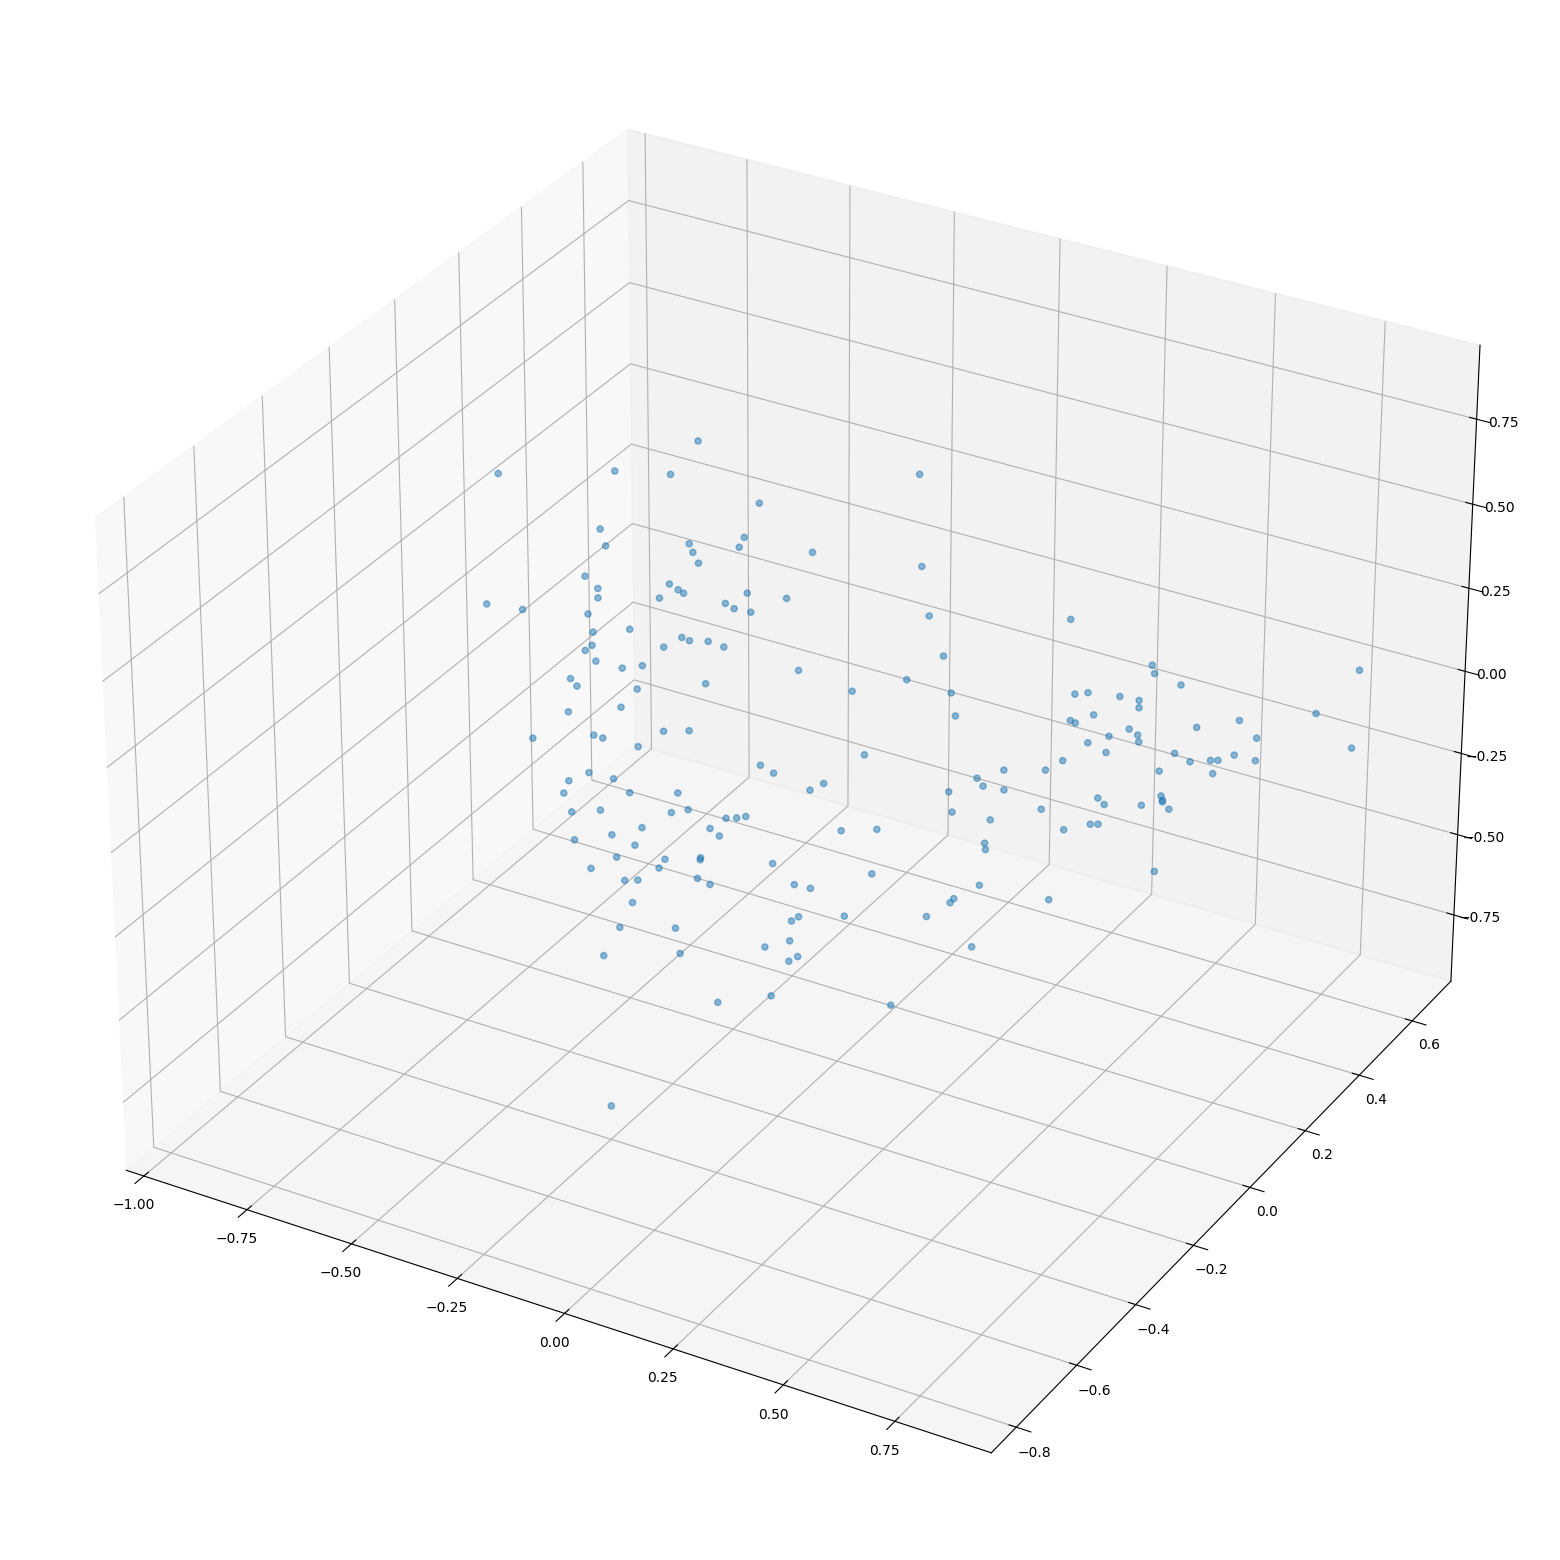

In [13]:
fig= plt.figure(figsize=(20,20))
ax=plt.axes(projection ="3d")
ax.scatter(x,y,z,alpha=0.5)

In [25]:
def initial_clusters(k,dim,df_pca):
    initial_Centroid=np.zeros([k,dim])
    for i in range(k):
        initial_Centroid[i]=df_pca[np.random.randint(len(df_pca))]
    return initial_Centroid


In [26]:
def assignCluster(pt,centroids,k):
    tempdis=np.zeros((m,k))
    for i in range(m):
        for j in range(k):
            tempdis[i,j]=np.sqrt(np.sum((pt[i]-centroids[j])**2))
    # print(tempdis)
    labels=[]
    labels.append(tempdis.argmin(axis=1))
    #print(labels)
    return np.array(labels).ravel()

In [27]:
 def updateCentroid(x,k,labels):
    new_Centroid=[]
    
    for i in range(k):
        cluster_points = x[labels == i]
        new_Centroid.append(cluster_points.mean(axis=0))
    return new_Centroid

In [39]:
def cal_cost(x,centroid,labels):
    cost=0
    #print(centroid,"\n")
    for i in range(m):
        cost=cost+((x[i]-centroid[labels[i]]).sum())**2
    cost=cost/m;
    #print(cost)
    return cost

In [40]:
def kmeans(iter_max,k,x,dim):
    cost=[]
    centroids=initial_clusters(k,dim,x)
    c=0
    labels=[]
    #print("centroids",centroids)
    for i in range(iter_max):
        # print(i,"######################################################")
        #print("centroids",centroids)
        labels=assignCluster(x,centroids,k)
        #print(centroids[1])
        c=cal_cost(x,centroids,labels)
        cost.append(c)
        #print(c)
        new_centroid= updateCentroid(x,k,labels)
        #print(new_centroid)
        if np.array_equal(centroids, new_centroid):
            #print("break",i)
            break
        else:
            centroids=np.copy(new_centroid)
    #plot(df_pca,labels,centroids)
    #print(c)
    return centroids,c,labels


In [41]:
def elbow_graph(k_max):
    cost=[]
    k_iter= np.arange(1,k_max+1,1)
    for l in range(1,k_max+1):
        centoids ,c,labels=kmeans(100,l,df_pca,3)  
        cost.append(c)
    
    plt.plot(k_iter,cost,marker="o")
    plt.xlabel("Number of clusters")
    plt.ylabel("Sum of squared distances")
    plt.title("Elbow Curve")
    plt.xticks([1,2,3,4,5,6,7,8,9,10])
    plt.show()
    

In [42]:
def plot(df_pca,labels,centroids):
    fig=plt.figure(figsize=(30,30))
    ax1=fig.add_subplot(111,projection='3d')
    ax1.scatter(x,y,z,c=labels,cmap='viridis',s=100,vmin=-1,vmax=3)
    ax1.scatter(*centroids,marker="X",s=400,color="red",ec="green",label="Centroid")
    ax1.legend(fontsize=20)
    plt.title("3D PROJECTION",size=80,)
    plt.show()

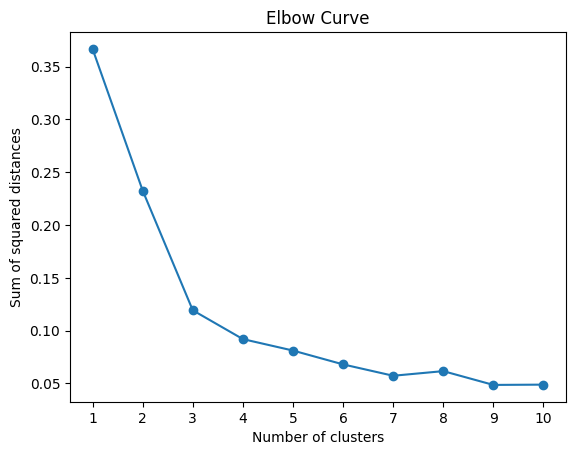

In [43]:
elbow_graph(10)

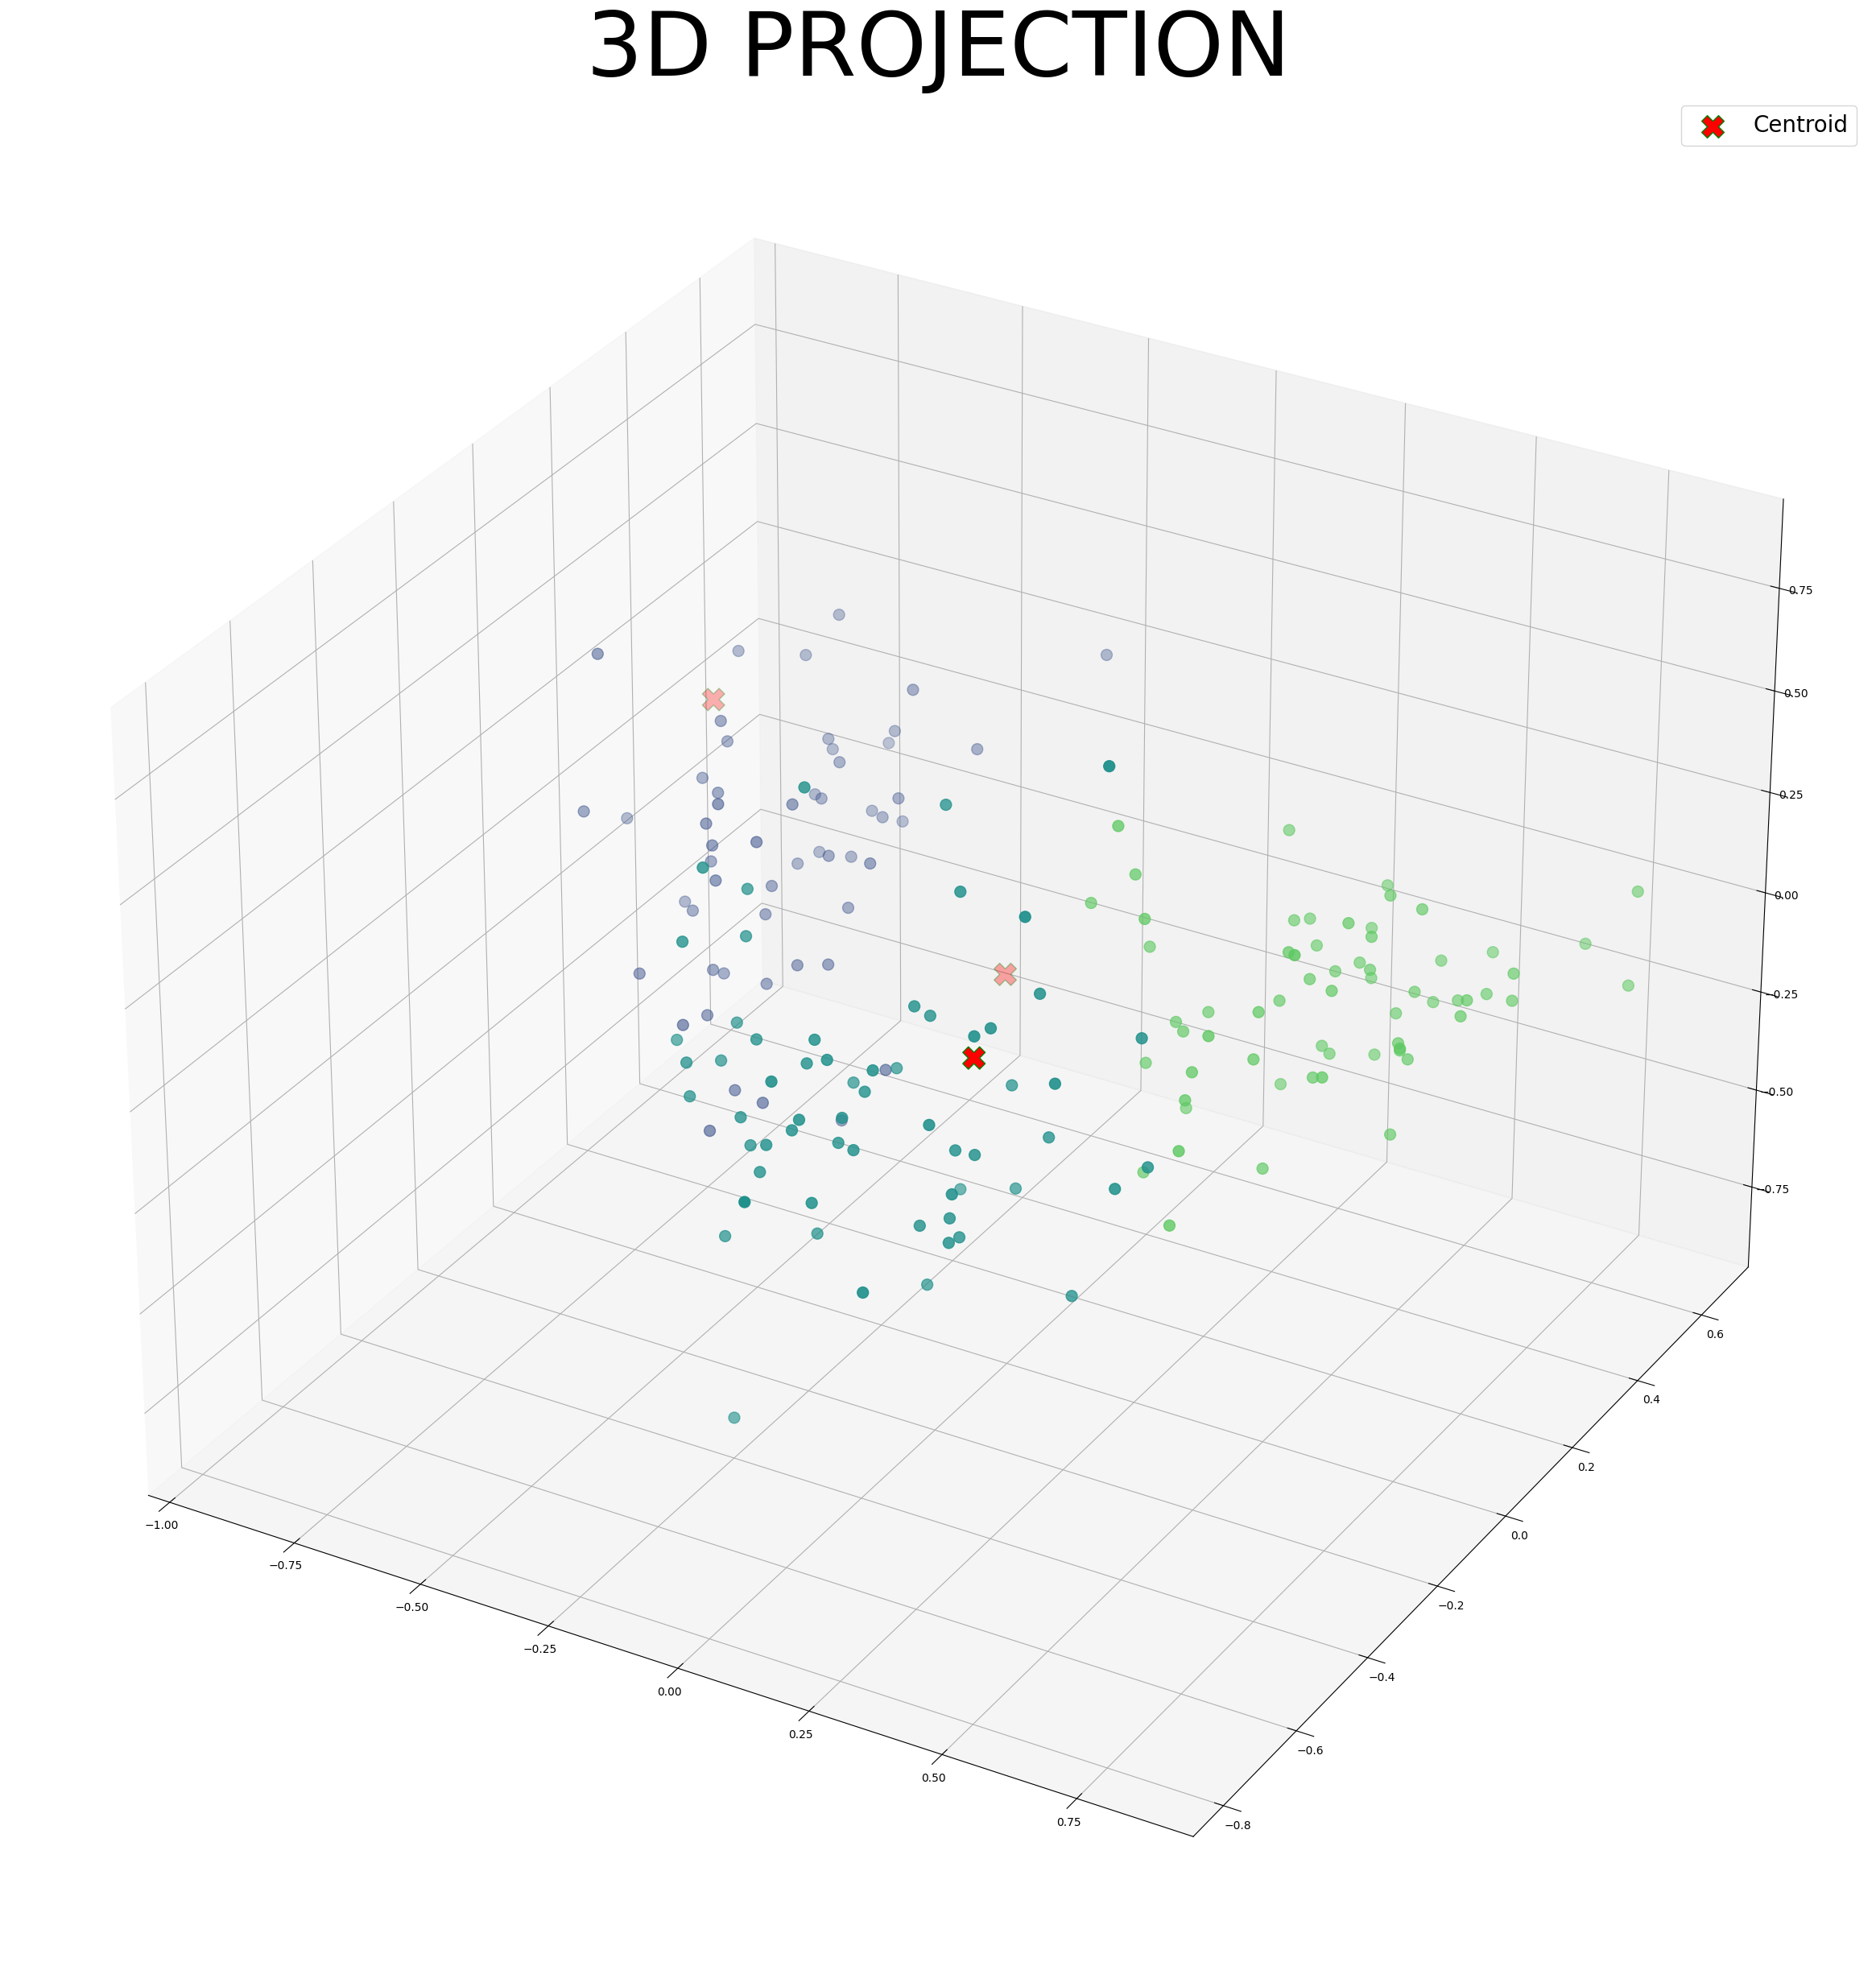

In [44]:
centroids,cost,labels=kmeans(100,3,df_pca,3)
plot(df_pca,labels,centroids)

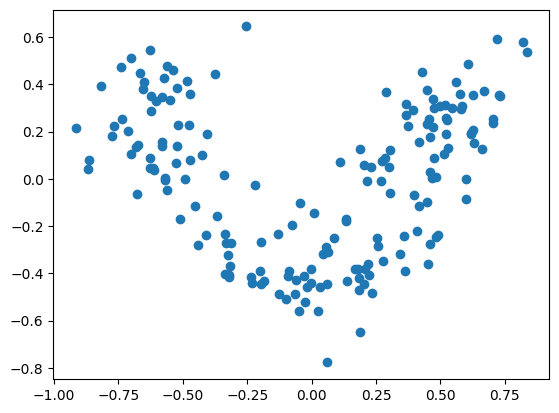

In [45]:
df_pca_2 = PCA(n_components=2).fit_transform(scaled)
plt.scatter(df_pca[:,0],df_pca[:,1])

plt.show()

In [48]:
centroids,cost,labels=kmeans(100,3,df_pca_2,2)
centroids

array([[ 0.48503975,  0.17742871],
       [-0.01701227, -0.36612572],
       [-0.59750634,  0.21895939]])

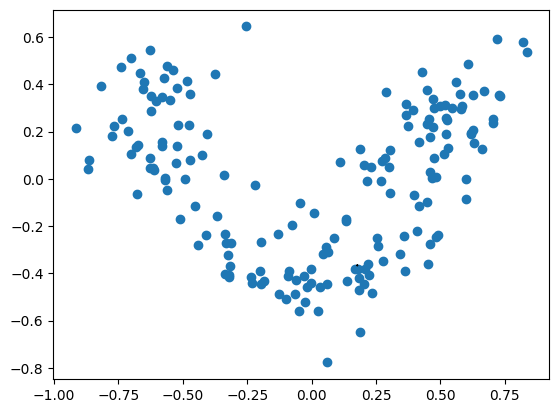

In [49]:
plt.scatter(df_pca[:,0],df_pca[:,1])
plt.scatter(*centroids,marker="X",c="black")